# Problem definition: Design a DFA and NFA that detects the following pattern (11011) in a string of 0s and 1s taking into consideration the overlapping.

# The Two graphs and schedules for NFA and DFA, and tracing for each test case in the Assignment paper

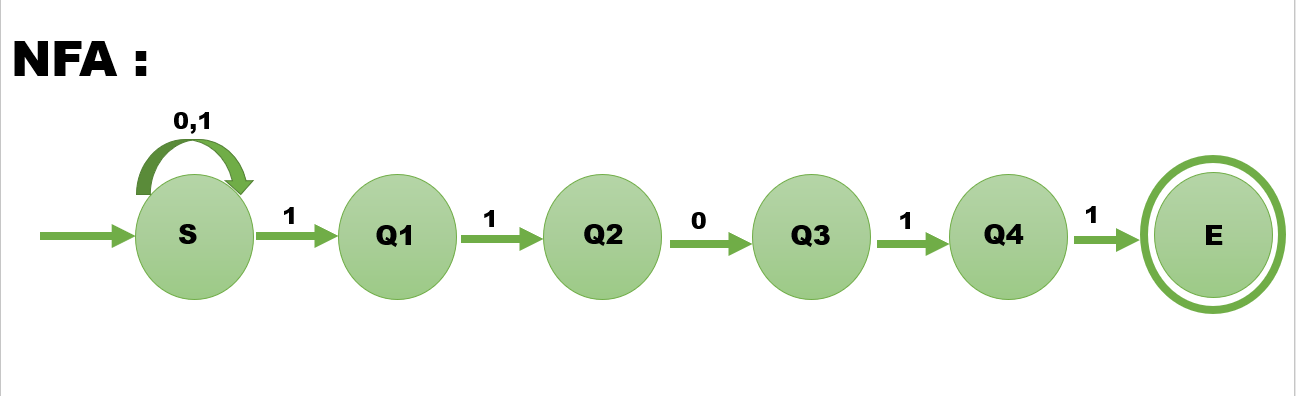

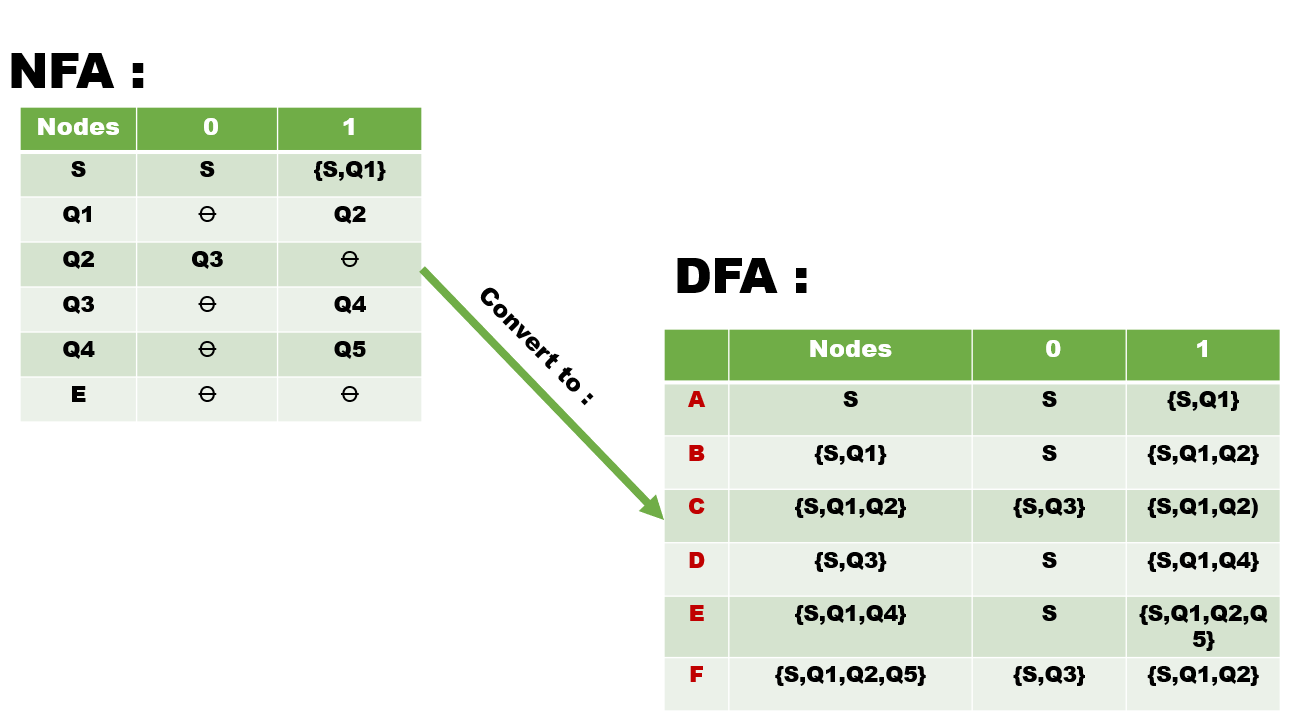

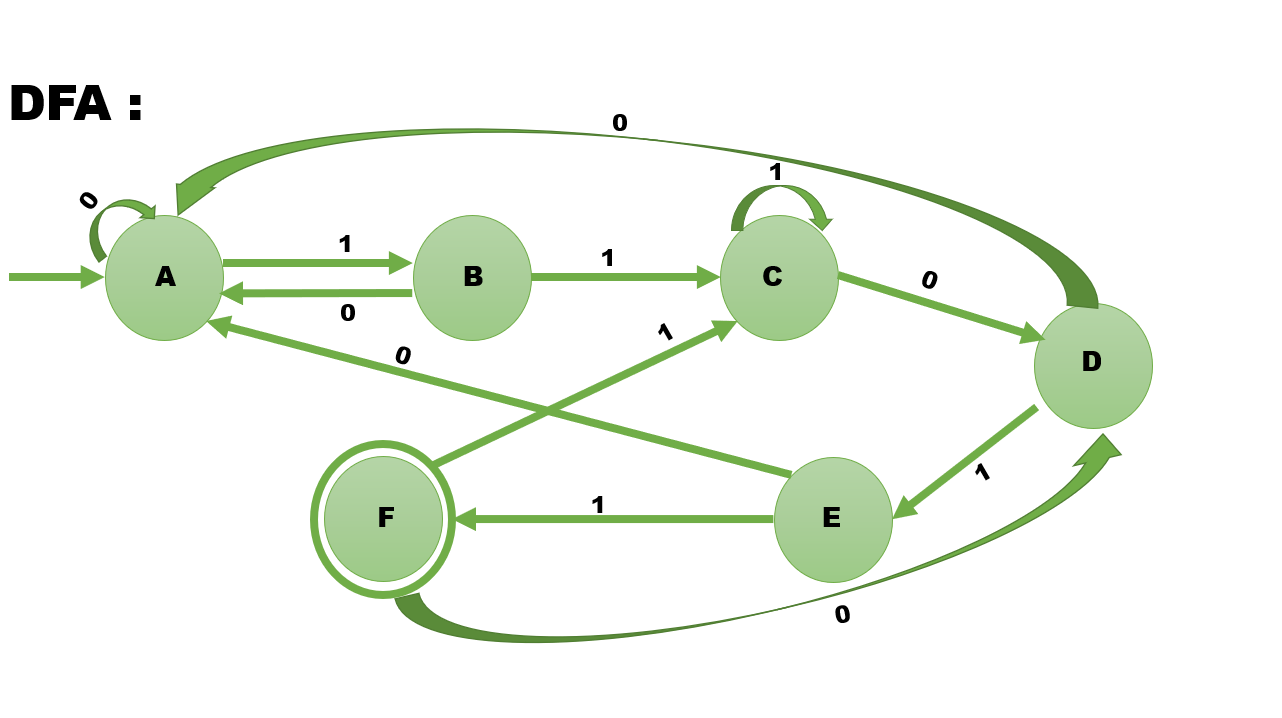

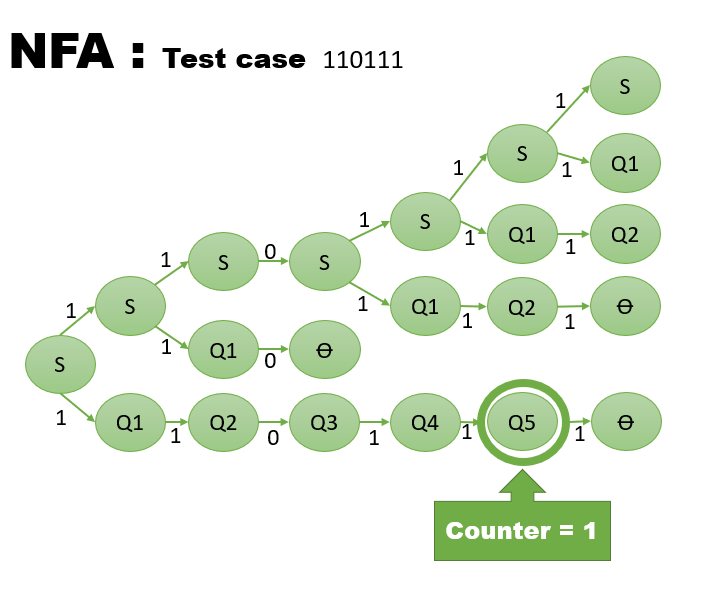

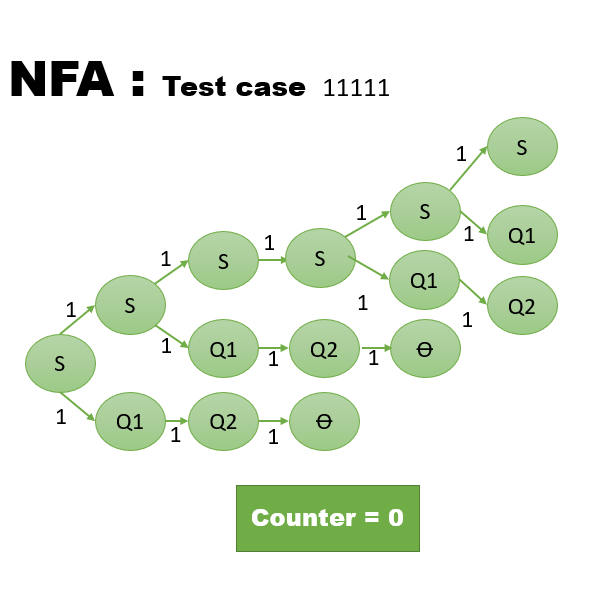

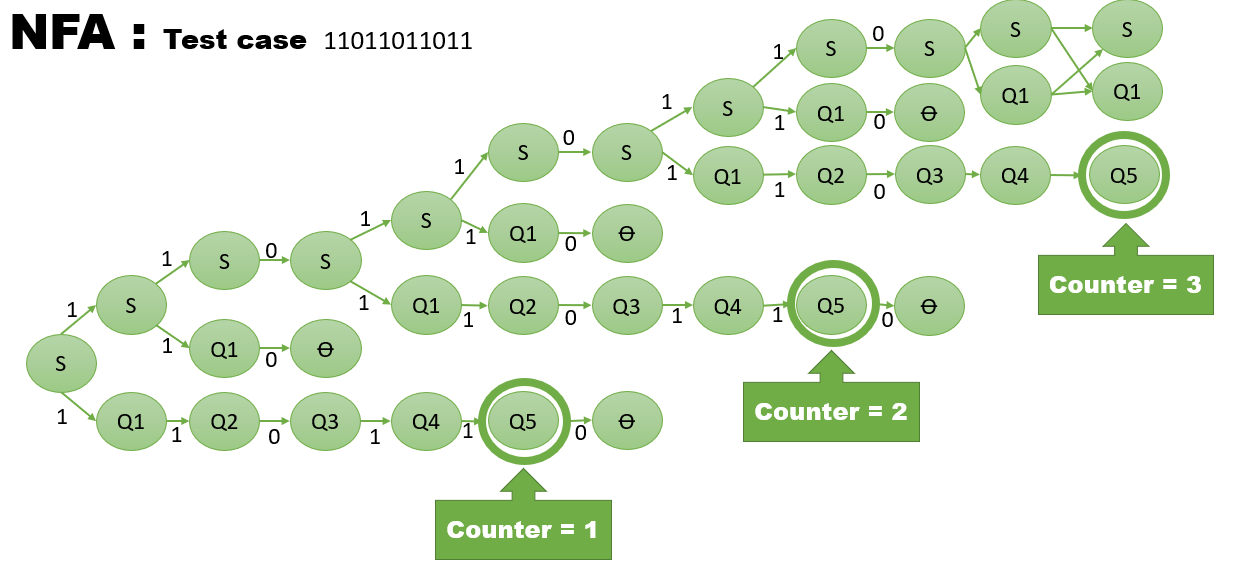

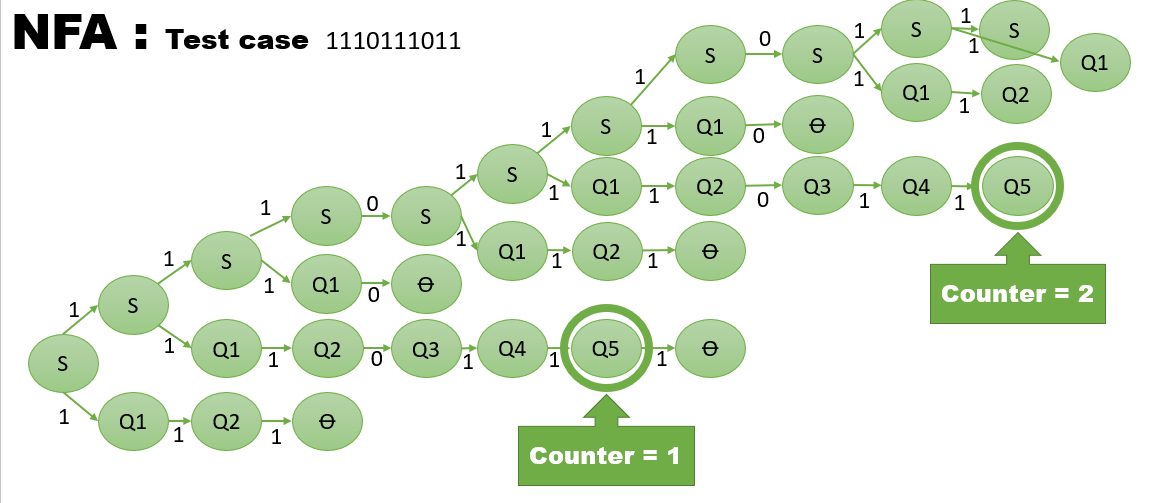

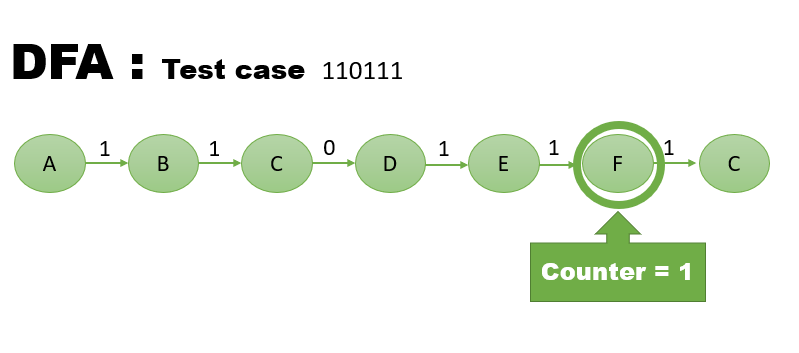

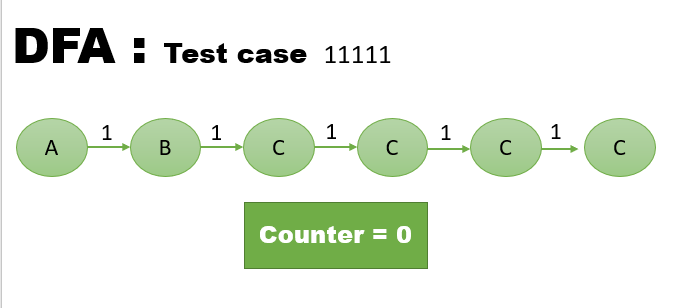

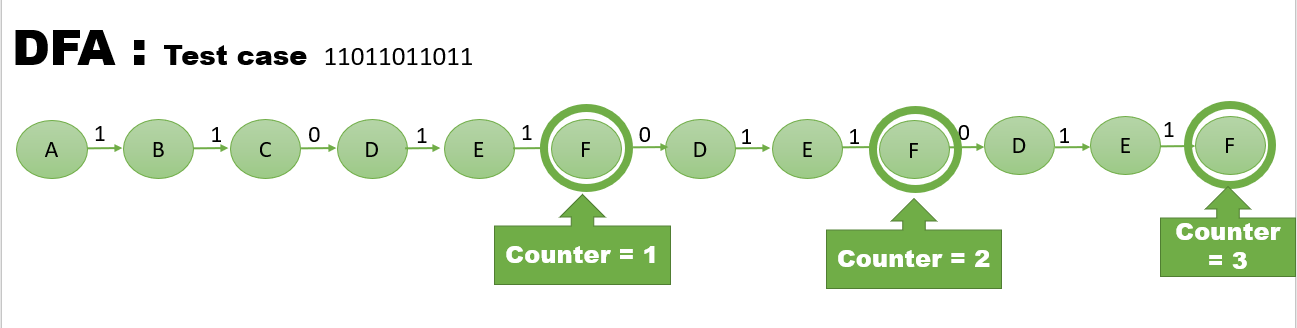

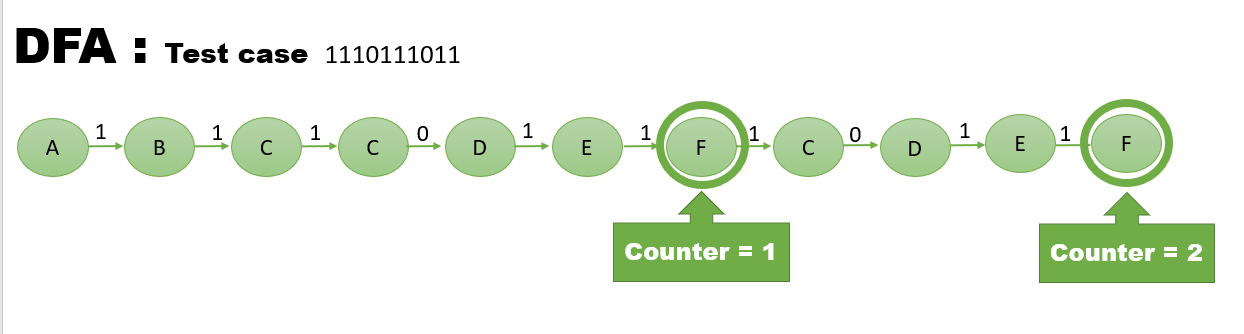

# Code of NFA

In [9]:
# I Used recursion and dynamic programing for design NFA 
# By make for each state a function and call of them
#--------------------------------------------

# test case
s1 = '110111'
s2 = '11111'
s3 = '11011011011'
s4 = '1110111011'

# Function to take initial state
def q0(s):
    if len(s) == 0: # Not Accepted state as string are empty string
        return 0
    else:
        if s[0] == '1': # If state get 1 char from string 
            return q1(s[1:]) + q0(s[1:])
        if s[0] == '0': # If state get 0 char from string
            return q0(s[1:])
        
# Function to take q1 state
def q1(s):
    if len(s) == 0:
        return 0
    else:
        if s[0] == '1':
            return q2(s[1:])
        else:
            return 0
# Function to take q2 state
def q2(s):
    if len(s) == 0: 
        return 0
    else:
        if s[0] == '0':
            return q3(s[1:])
        else:
            return 0
# Function to take q3 state
def q3(s):
    if len(s) == 0:
        return 0
    else:
        if s[0] == '1':
            return q4(s[1:])
        else:
            return 0
# Function to take q4 state
def q4(s):
    if len(s) == 0:
        return 0
    else:
        if s[0] == '1':
            return q5(s[1:])
        else:
            return 0
# Function to take final state
def q5(s):
    return 1       # That state will be counter when making the recursion
    
    
    
    
# print test cases
print("Number of 11011 repetation NFA case 1= ",q0(s1))
print("Number of 11011 repetation NFA case 2= ",q0(s2))
print("Number of 11011 repetation NFA case 3= ",q0(s3))
print("Number of 11011 repetation NFA case 4= ",q0(s4))

Number of 11011 repetation NFA case 1=  1
Number of 11011 repetation NFA case 2=  0
Number of 11011 repetation NFA case 3=  3
Number of 11011 repetation NFA case 4=  2


# Code of DFA

In [10]:
# I Used recursion and dynamic programing for design DFA
# By make for each state a function and call of them
# --------------------------------------------

# test case
s1 = '110111'
s2 = '11111'
s3 = '11011011011'
s4 = '1110111011'

counter = 0 # Static counter = 0 to count Number of '11011' in the string
# Take
def A(s, counter): 
    if len(s) == 0: # Not Accepted
        return counter
    else:  #1 1 0 1 1
        if s[0] == '0':
            return A(s[1:], counter)
        if s[0] == '1':
            return B(s[1:], counter)

def B(s, counter):
    if len(s) == 0: # Not Accepted
        return counter
    else:
        if s[0] == '0':
            return A(s[1:], counter)
        if s[0] == '1':
            return C(s[1:], counter)
def C(s, counter):
    if len(s) == 0: # Not Accepted
        return counter
    else:
        if s[0] == '0':
            return D(s[1:], counter)
        if s[0] == '1':
            return C(s[1:], counter)

def D(s, counter):
    if len(s) == 0: # Not Accepted
        return counter
    else:
        if s[0] == '0':
            return A(s[1:], counter)
        if s[0] == '1':
            return E(s[1:], counter)

def E(s, counter):
    if len(s) == 0: # Not Accepted
        return counter
    else:
        if s[0] == '0':
            return A(s[1:], counter)
        if s[0] == '1':
            return F(s[1:], counter)

def F(s, counter):
    counter+=1
    if len(s) == 0:
        return counter
    else:
        if s[0] == '0':
            return D(s[1:], counter)
        if s[0] == '1':
            return C(s[1:], counter)
# print test cases
print("Number of 11011 repetation Using DFA case 1= ",A(s1, counter))
print("Number of 11011 repetation Using DFA case 2= ",A(s2, counter))
print("Number of 11011 repetation Using DFA case 3= ",A(s3, counter))
print("Number of 11011 repetation Using DFA case 4= ",A(s4, counter))


Number of 11011 repetation Using DFA case 1=  1
Number of 11011 repetation Using DFA case 2=  0
Number of 11011 repetation Using DFA case 3=  3
Number of 11011 repetation Using DFA case 4=  2


# Another Code of DFA using tree from scratch

In [11]:
class DFA_automata: #class to build the automata itself
    
    def __init__(self, initial_state, states, terminal_state):# each DFA automata start from state and end with acceptance state
        
        self.initial_state = initial_state
        self.terminal_state = terminal_state
        self.states = states
        
   
        
    def get_next_state(self, current_state, val_of_transition):# return the state i will be go from current state if some value come 
        for link in current_state.links:
            if link.val_of_transition == val_of_transition:
                return link.end_state


    def counting_accept_state(self, string):# counting the number of 11011 reetation i string 
        state = self.initial_state
        counter = 0 
        for character in string:
            state = self.get_next_state(state, character)
            if self.terminal_state.equal_states(state):
                counter +=1
        return counter
    
class state:
    def __init__(self, val):# constractor of class node to intialize a variables of the class
        self.val = val # name of the node 
        self.links = [] # links go out of the node 
    def insert(self, link):# add link of array of links attached by state 
        self.links.append(link)
    def equal_states(self, state): # check if two states equales (return true or false)
        if len(self.links) == len(state.links): #check in begain of number of links
            flag = (self.val == state.val) # check if state name are equals (equal --> flag=1 else --> flag =0)
            for i in range(len(self.links)):
                flag = flag and (self.links[i] == state.links[i]) # if one link in both are not equal so flag will be false
            return flag
        else:
            return False
        
class Link:
    def __init__(self, start_state, val_of_transition, end_state): # each link have a start and end state and reson to transation from state to another
        self.val_of_transition = val_of_transition #value of trainstion 
        self.start_state = start_state
        self.end_state = end_state
    
A = state("A")
B = state("B")
C = state("C")
D = state("D")
E = state("E")
F = state("F")


A_0_A = Link(A, '0', A)
A_1_B = Link(A, '1', B)
B_0_A = Link(B, '0', A)
B_1_C = Link(B, '1', C)
C_0_D = Link(C, '0', D)
C_1_C = Link(C, '1', C)
D_0_A = Link(D, '0', A)
D_1_E = Link(D, '1', E)
E_0_A = Link(E, '0', A)
E_1_F = Link(E, '1', F)
F_0_D = Link(F, '0', D)
F_1_C = Link(F, '1', C)

A.insert(A_0_A)
A.insert(A_1_B)
B.insert(B_0_A)
B.insert(B_1_C)
C.insert(C_0_D)
C.insert(C_1_C)
D.insert(D_0_A)
D.insert(D_1_E)
E.insert(E_0_A)
E.insert(E_1_F)
F.insert(F_0_D)
F.insert(F_1_C)

a = DFA_automata(A, [A , B , C , D , E , F], F)
print("Number of 11011 repetation = ",a.counting_accept_state('110111')) 
print("Number of 11011 repetation = ",a.counting_accept_state('111111')) 
print("Number of 11011 repetation = ",a.counting_accept_state('11011011011'))
print("Number of 11011 repetation = ",a.counting_accept_state('1110111011'))

Number of 11011 repetation =  1
Number of 11011 repetation =  0
Number of 11011 repetation =  3
Number of 11011 repetation =  2
